In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
torch.set_printoptions(edgeitems=2, linewidth=75)

from sklearn.model_selection import GridSearchCV

# Ex1.- Stochastic Gradient Descent

In [3]:
def f(x):
  return-((x-2)**2)+3
  
def df(x):
  return -2*(x-2)

In [4]:
tol = 0.000001
x = np.random.rand()*10
diff=1
alpha=0.001

while(diff>tol):
   x_new = x + alpha*df(x) 
   diff= np.abs(x-x_new)
   x=x_new
   # print("err="+str(diff))
print("x="+str(x))
print("y="+str(f(x)))

x=2.000498800458012
y=2.999999751198103


# Ex2.- Backpropagation y chain rule

# Ex3.- Deep Learning and regularization

## Create Dataset

In [ ]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 10000).view(-1,1)
        self.len = self.x.shape[0]

        self.n = torch.empty(self.len).normal_(mean=0,std=0.2).view(-1,1)
        
        self.y = torch.mul(torch.pow(self.x, 2),3)
        self.y.add_(3)
        self.y.add_(self.n)

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

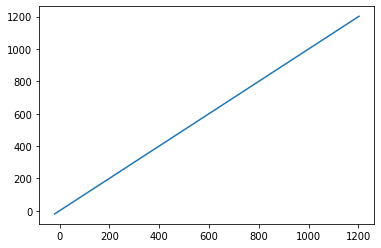

In [ ]:
data=Data()
plt.plot(data[0],data[1])

In [ ]:
def create_datset():
  x = np.random.uniform(0,20,10000)
  N = np.random.normal(0,0.2)
  y = np.power((x-2),2)*+3+N
  return np.array([x,y])

def split(data,p_train=.80,p_val=.10):
  len_train=int(data.shape[1]*p_train)
  len_val=int(data.shape[1]*p_val)
  np.random.shuffle(data.T)

  x_train = np.array(data[0,0:len_train]) 
  y_train = np.array(data[1,0:len_train])
  x_val = np.array(data[0,len_train:len_train+len_val]) 
  y_val = np.array(data[1,len_train:len_train+len_val])
  x_test = np.array(data[0,len_train+len_val:int(data.shape[1])]) 
  y_test = np.array(data[1,len_train+len_val:int(data.shape[1])])

  return x_train, y_train, x_val, y_val, x_test, y_test

Test, Val, Test:
(8000,) (8000,)
(0,) (0,)
(2000,) (2000,)


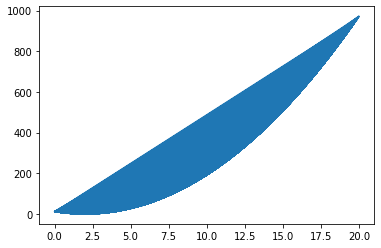

In [ ]:
data=create_datset()
x_train, y_train, x_val, y_val, x_test, y_test = split(data,p_val=0)

print("Test, Val, Test:")
print(x_train.shape, y_train.shape)
print(x_val.shape, x_val.shape)
print(x_test.shape, y_test.shape)
plt.plot(x_train,y_train)

## Define first model 
y = w1\*x^2 + w2\*x + w3

In [ ]:
def model(t_u, w):
  return w[0] * t_u**2 + w[1] * t_u + w[2]

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
t_u = torch.from_numpy(x_train)
t_c = torch.from_numpy(y_train)

In [ ]:
## Run once
# params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
# learning_rate = 1e-5
# optimizer = optim.SGD([params], lr=learning_rate)

# t_p = model(t_u, params)
# loss = loss_fn(t_p, t_c)
# loss.backward()

# optimizer.step()

# params

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [ ]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

weighs = training_loop(
          n_epochs = 10000, 
          optimizer = optimizer,
          params = params,
          t_u = t_u,
          t_c = t_c)

Epoch 500, Loss 799.905360
Epoch 1000, Loss 678.402005
Epoch 1500, Loss 575.881725
Epoch 2000, Loss 489.377726
Epoch 2500, Loss 416.386646
Epoch 3000, Loss 354.796528
Epoch 3500, Loss 302.825271
Epoch 4000, Loss 258.969559
Epoch 4500, Loss 221.961039
Epoch 5000, Loss 190.729466
Epoch 5500, Loss 164.372121
Epoch 6000, Loss 142.126831
Epoch 6500, Loss 123.351067
Epoch 7000, Loss 107.502693
Epoch 7500, Loss 94.123951
Epoch 8000, Loss 82.829147
Epoch 8500, Loss 73.292237
Epoch 9000, Loss 65.238721
Epoch 9500, Loss 58.436705
Epoch 10000, Loss 52.690533


In [ ]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
weighs = training_loop(
          n_epochs = 4000, 
          optimizer = optimizer,
          params = params,
          t_u = t_u,
          t_c = t_c)

Epoch 500, Loss 122.695032
Epoch 1000, Loss 56.359671
Epoch 1500, Loss 25.071141
Epoch 2000, Loss 8.191044
Epoch 2500, Loss 1.832512
Epoch 3000, Loss 0.254415
Epoch 3500, Loss 0.019198
Epoch 4000, Loss 0.000660


In [ ]:
def calc_forward(t_u, t_c, params, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, params)
        loss = loss_fn(t_p, t_c)
    return loss

In [ ]:
t_u_test = torch.from_numpy(x_test)
t_c_test = torch.from_numpy(y_test)

calc_forward(t_u_test,t_c_test,weighs,is_train=False)

tensor(0.0007, dtype=torch.float64)

### Use gridsearch to find hyperparameters


In [ ]:
params = {
    'lr': [0.0001, 0.001, 0.01, 0.1, 1.]
    # 'max_epochs': list(range(1000, 10000, 1000))
    # 'optimizer': [optim.SGD([params], lr=learning_rate), optim.Adam([params], lr=learning_rate)]
}

gs = GridSearchCV(model, params, refit=False, verbose=1, cv=10)

gs.fit(t_u, t_c)

TypeError: ignored

## Function approximation using neural networks